# Routine to look at when soundings are available at PABR site


https://weather.uwyo.edu/upperair/sounding.html

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 12})
import pandas as pd
from datetime import datetime

import sys
sys.path.append('./scripts/')

from LIB_sounding_date_checks import grab_sounding_dates

### Look at when requested [Wyoming Upper Air sounding](https://weather.uwyo.edu/upperair/sounding.html) data was available

In [2]:
# naming convention used for files, with {} = YYYY
#======================================================================
csv_name = './sounding_checks/checked_{}0101Z00_{}1231Z23_hourly6.csv'
#======================================================================

# function to plot dots when soundings where found
def plot_soundingexist(doy, sou, year, s = 1, c = 'k', alpha = 0.5, marker='.'):
    doy_soundings = doy[sou==1]
    year_soundings = np.full_like(doy_soundings, year)
    plt.scatter(doy_soundings, year_soundings, s=s, c=c, alpha=alpha, marker=marker)

Text(0.5, 0, 'day of year')

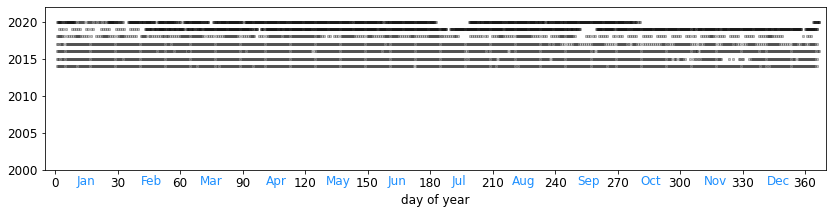

In [4]:

# create figure
fig, ax = plt.subplots(figsize=(14,3))

# plot sounding existence for multiple years
for year in np.arange( 2014 , 2021 ):
    plot_soundingexist(*grab_sounding_dates(csv = csv_name.format(year,year), hours = [0,6,12,18]), 
                       s=2, alpha=0.25, marker='s')

# generate mid month labels
label_doys = []
label_names = []
for month_num in range(1,13):
    if month_num < 6:
        midmonth = 15
    else:
        midmonth = 12
    label_doys.append(int(datetime(year = 2020, month = month_num, day = midmonth).strftime('%j')))
    label_names.append(datetime(year = 2020, month = month_num, day = midmonth).strftime('%B')[:3])
for ll, label in enumerate(label_names):
    ax.text(label_doys[ll], 1998, label, c='dodgerblue', horizontalalignment='center')

ax.set_xlim(-5,370)
ax.set_ylim(2000,2022)
ax.set_xticks(np.arange(0,361,30))
ax.set_xlabel('day of year')